# Import data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign path string to variable
path = r'D:\Docs\Career Foundry\II. Data Immersion\4. Python Fundamentals for Data Analysts\Instacart Basket Analysis - Alina Racu'

In [3]:
# Import pkl file
df_ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9 ords_prods_cust_merged_clean.pkl'))

In [4]:
# Check
df_ords_prods_cust_merged.shape

(9990906, 31)

In [5]:
# Show all columns
pd.options.display.max_columns = None

In [6]:
# Check
df_ords_prods_cust_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Slowest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy,Slowest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


# Security implications

Names and surnames of customers have been removed from the dataframe in previous steps due to the sensitivity of such data.

# Customer profiling & visualizations

## Exclude low activity customers from dataframe

In [7]:
# Create a flag for customer activity
df_ords_prods_cust_merged.loc[df_ords_prods_cust_merged["max_order"] < 5, "customer_activity"] = "Low activity"
df_ords_prods_cust_merged.loc[df_ords_prods_cust_merged["max_order"] >= 5, "customer_activity"] = "High activity"

In [8]:
# Check
df_ords_prods_cust_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,customer_activity
0,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,High activity
1,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,High activity
2,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,High activity
3,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Regularly busy,Slowest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,High activity
4,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy,Slowest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,High activity


In [9]:
# Create subset with high activity customers only (exclude low-activity)
df_ords_prods_cust_merged_new = df_ords_prods_cust_merged[df_ords_prods_cust_merged["customer_activity"] == "High activity"]

In [10]:
# Check
df_ords_prods_cust_merged_new.shape

(9216591, 32)

In [11]:
# Create subset with low activity customers only 
low_activity_cust = df_ords_prods_cust_merged[df_ords_prods_cust_merged["customer_activity"] == "Low activity"]

In [12]:
# Check
low_activity_cust.shape

(774315, 32)

In [13]:
# Check
len(df_ords_prods_cust_merged_new)+len(low_activity_cust)

9990906

In [14]:
# Check
df_ords_prods_cust_merged_new["max_order"].min()

5

In [15]:
# Check
low_activity_cust["max_order"].max()

4

In [16]:
# Export subset with high activity customers
df_ords_prods_cust_merged_new.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 ords_prods_cust_merged_new.pkl'))

In [17]:
# Export subset with low activity customers
low_activity_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10 low_activity_cust.pkl'))

## Define regions

In [18]:
# Create empty list
result = []

# For loop
for value in df_ords_prods_cust_merged_new["state"]:
    if (value == "Maine") or (value == "New Hampshire") or (value == "Vermont") or (value == "Massachusetts") or (value == "Rhode Island") or (value == "Connecticut") or (value == "New York")  or (value == "Pennsylvania") or (value == "New Jersey"):
        result.append("Northeast")
    elif (value == "Wisconsin") or (value == "Michigan") or (value == "Illinois") or (value == "Indiana") or (value == "Ohio") or (value == "North Dakota") or (value == "South Dakota")  or (value == "Nebraska") or (value == "Kansas") or (value == "Minnesota") or (value == "Iowa") or (value == "Missouri"):
        result.append("Midwest")
    elif (value == "Delaware") or (value == "Maryland") or (value == "District of Columbia") or (value == "Virginia") or (value == "West Virginia") or (value == "North Carolina") or (value == "South Carolina")  or (value == "Georgia") or (value == "Florida") or (value == "Kentucky") or (value == "Tennessee") or (value == "Mississippi") or (value == "Alabama") or (value == "Oklahoma") or (value == "Texas") or (value == "Arkansas") or (value == "Louisiana"):
        result.append("South")
    elif (value == "Idaho") or (value == "Montana") or (value == "Wyoming") or (value == "Nevada") or (value == "Utah") or (value == "Colorado") or (value == "Arizona")  or (value == "New Mexico") or (value == "Alaska") or (value == "Washington") or (value == "Oregon") or (value == "California") or (value == "Hawaii"):
        result.append("West")
    else:
        result.append("NA")

In [19]:
# Print list "result"
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South'

In [20]:
# Create new column "region" and set it equal to list "result"
df_ords_prods_cust_merged_new["region"] = result

<ipython-input-20-f384b78bba0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ords_prods_cust_merged_new["region"] = result


In [21]:
# Check
df_ords_prods_cust_merged_new["region"].value_counts()

South        3077021
West         2359270
Midwest      2150271
Northeast    1630029
Name: region, dtype: int64

In [22]:
# Determine whether there's a difference in spending habits between the different US regions
# Create a crosstab between "region" and "spending_flag"
crosstab_region_spend = pd.crosstab(df_ords_prods_cust_merged_new["region"], df_ords_prods_cust_merged["spending_flag"], dropna = False)

In [23]:
# Print
crosstab_region_spend

spending_flag,High spender,Low spender
region,,
Midwest,36882,2113389
Northeast,25674,1604355
South,52526,3024495
West,40126,2319144


The highest number of high spenders are based in the South, while the highest number of low spenders are located in the West.

In [24]:
# Copy to clipboard
crosstab_region_spend.to_clipboard()

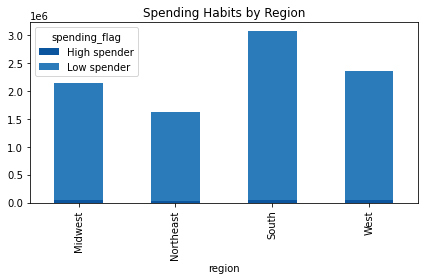

In [25]:
# Create bar chart
crosstab_region_spend_chart = crosstab_region_spend.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.title("Spending Habits by Region")
plt.tight_layout()

In [26]:
# Export chart
crosstab_region_spend_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_region_spend_chart'))

## Define age groups

In [27]:
# Check
df_ords_prods_cust_merged_new.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge', 'customer_activity',
       'region'],
      dtype='object')

In [28]:
# Check min
df_ords_prods_cust_merged_new["age"].min()

18

In [29]:
# Check max
df_ords_prods_cust_merged_new["age"].max()

81

In [30]:
# Create variable "age_group"
df_ords_prods_cust_merged_new.loc[(df_ords_prods_cust_merged_new["age"] >= 18) & (df_ords_prods_cust_merged_new["age"] < 35), "age_group"] = "Young adults"
df_ords_prods_cust_merged_new.loc[(df_ords_prods_cust_merged_new["age"] >= 35) & (df_ords_prods_cust_merged_new["age"] < 45), "age_group"] = "Middle aged adults"
df_ords_prods_cust_merged_new.loc[(df_ords_prods_cust_merged_new["age"] >= 45) & (df_ords_prods_cust_merged_new["age"] < 65), "age_group"] = "Late middle aged adults"
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new["age"] >=65, "age_group"] = "Seniors"

C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [31]:
# Check
df_ords_prods_cust_merged_new["age_group"].value_counts()

Late middle aged adults    2885332
Young adults               2446742
Seniors                    2444854
Middle aged adults         1439663
Name: age_group, dtype: int64

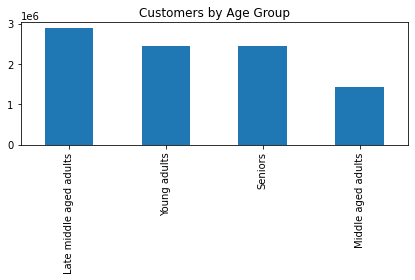

In [32]:
# Create bar chart
age_chart = df_ords_prods_cust_merged_new["age_group"].value_counts().plot.bar()
plt.title("Customers by Age Group")
plt.tight_layout()

In [33]:
# Export chart
age_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_chart.png'))

## Define income categories

In [34]:
# Check min
df_ords_prods_cust_merged_new["income"].min()

25903

In [35]:
# Check max
df_ords_prods_cust_merged_new["income"].max()

593901

In [36]:
# Create variable "income_categ"
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new["income"] < 50000, "income_categ"] = "Low income"
df_ords_prods_cust_merged_new.loc[(df_ords_prods_cust_merged_new["income"] >= 50000) & (df_ords_prods_cust_merged_new["income"] < 150000), "income_categ"] = "Middle class"
df_ords_prods_cust_merged_new.loc[(df_ords_prods_cust_merged_new["income"] >= 150000) & (df_ords_prods_cust_merged_new["income"] < 200000), "income_categ"] = "Upper middle class"
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new["income"] >= 200000, "income_categ"] = "High income"

C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [37]:
# Check
df_ords_prods_cust_merged_new["income_categ"].value_counts()

Middle class          7052909
Upper middle class    1092046
Low income             994187
High income             77449
Name: income_categ, dtype: int64

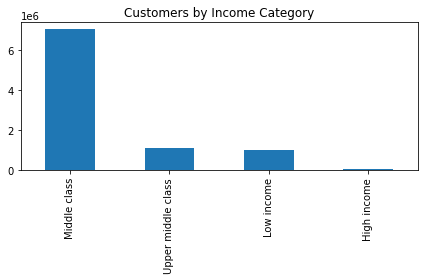

In [38]:
# Create bar chart
income_chart = df_ords_prods_cust_merged_new["income_categ"].value_counts().plot.bar()
plt.title("Customers by Income Category")
plt.tight_layout()

In [39]:
# Export chart
income_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_chart.png'))

## Label department

In [40]:
# Import department data 
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [41]:
# Check
df_dept.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [42]:
# Create column "department"
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 1, 'department'] = 'frozen'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 2, 'department'] = 'other'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 3, 'department'] = 'bakery'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 4, 'department'] = 'produce'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 5, 'department'] = 'alcohol'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 6, 'department'] = 'international'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 7, 'department'] = 'beverages'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 8, 'department'] = 'pets'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 9, 'department'] = 'dry goods pasta'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 10, 'department'] = 'bulk'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 11, 'department'] = 'personal care'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 12, 'department'] = 'meat seafood'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 13, 'department'] = 'pantry'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 14, 'department'] = 'breakfast'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 15, 'department'] = 'canned goods'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 16, 'department'] = 'dairy eggs'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 17, 'department'] = 'households'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 18, 'department'] = 'babies'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 19, 'department'] = 'snacks'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 20, 'department'] = 'deli'
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new['department_id'] == 21, 'department'] = 'missing'

C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [43]:
# Check
df_ords_prods_cust_merged_new["department"].value_counts()

produce            2710605
dairy eggs         1544854
snacks              825914
beverages           764777
frozen              627942
pantry              527679
bakery              333381
canned goods        298890
deli                298687
dry goods pasta     243446
households          206232
meat seafood        199737
breakfast           199493
personal care       125278
babies              124077
international        76220
alcohol              42514
pets                 27616
missing              19104
other                10147
bulk                  9998
Name: department, dtype: int64

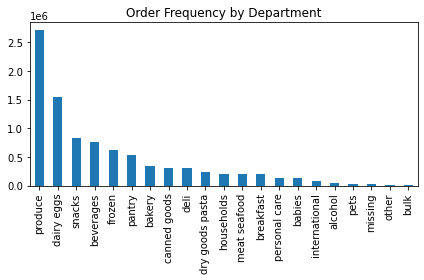

In [44]:
# Create bar chart
dept_chart = df_ords_prods_cust_merged_new["department"].value_counts().plot.bar()
plt.title("Order Frequency by Department")
plt.xticks(rotation=90)
plt.tight_layout()

In [45]:
# Export chart
dept_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_chart.png'))

## Define parental status

In [46]:
# Check
df_ords_prods_cust_merged_new["n_dependants"].value_counts().sort_index()

0    2297688
1    2297575
2    2302428
3    2318900
Name: n_dependants, dtype: int64

In [47]:
# Create variable "parental_status"
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new["n_dependants"] == 0, "parental_status"] = "Not parent"
df_ords_prods_cust_merged_new.loc[df_ords_prods_cust_merged_new["n_dependants"] > 0, "parental_status"] = "Parent"

C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Alina\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [48]:
# Check
df_ords_prods_cust_merged_new["parental_status"].value_counts()

Parent        6918903
Not parent    2297688
Name: parental_status, dtype: int64

<ipython-input-49-fa79a69e365b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel("")


Text(0, 0.5, '')

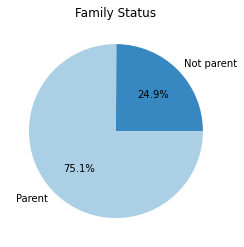

In [49]:
# Create pie chart
parent_chart = df_ords_prods_cust_merged_new['parental_status'].value_counts().sort_index().plot.pie(colors = sns.color_palette('Blues_r', 2), autopct='%1.1f%%')
plt.title("Family Status")
plt.axes().set_ylabel("")


In [50]:
# Export chart
parent_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_chart.png'))

# Max, mean, min aggregations for usage frequency & expenditure on a customer-profile level

In [52]:
# Check
df_ords_prods_cust_merged_new.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,customer_activity,region,age_group,income_categ,department,parental_status
0,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,7,New customer,6.344444,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,High activity,South,Young adults,Low income,beverages,Parent


## Usage frequency by age group

In [53]:
# Aggregate usage frenquency and group by age category
df_ords_prods_cust_merged_new.groupby("age_group").agg({"days_since_prior_order": ['mean', 'min', 'max']})

days_since_prior_order           
                                          mean  min   max
age_group                                                
Late middle aged adults              10.595487  0.0  30.0
Middle aged adults                   10.568823  0.0  30.0
Seniors                              10.600149  0.0  30.0
Young adults                         10.642400  0.0  30.0

## Usage frequency by income category

In [54]:
# Aggregate usage frenquency and group by income category
df_ords_prods_cust_merged_new.groupby("income_categ").agg({"days_since_prior_order": ['mean', 'min', 'max']})

days_since_prior_order           
                                     mean  min   max
income_categ                                        
High income                     10.019449  0.0  30.0
Low income                      10.950112  0.0  30.0
Middle class                    10.582305  0.0  30.0
Upper middle class              10.480341  0.0  30.0

## Usage frequency by parental status

In [55]:
# Aggregate usage frenquency and group by parental status
df_ords_prods_cust_merged_new.groupby("parental_status").agg({"days_since_prior_order": ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
parental_status                                  
Not parent                   10.596944  0.0  30.0
Parent                       10.607693  0.0  30.0

## Usage frequency by department

In [56]:
# Aggregate usage frenquency and group by department
df_ords_prods_cust_merged_new.groupby("department").agg({"days_since_prior_order": ['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
department                                       
alcohol                       9.820486  0.0  30.0
babies                        9.633235  0.0  30.0
bakery                       10.591315  0.0  30.0
beverages                    10.555663  0.0  30.0
breakfast                    10.820123  0.0  30.0
bulk                          9.760370  0.0  30.0
canned goods                 11.080440  0.0  30.0
dairy eggs                   10.497822  0.0  30.0
deli                         10.856368  0.0  30.0
dry goods pasta              11.207444  0.0  30.0
frozen                       11.194208  0.0  30.0
households                   11.406454  0.0  30.0
international                10.720485  0.0  30.0
meat seafood                 10.883617  0.0  30.0
missing                       9.820219  0.0  30.0
other                        10.490427  0.0  30.0
pantry                       10.624234  0.0  30.0
personal care                11.024745  0.0  30.0
pets                         11.274537  0.0  30.0
produce                      10.379596  0.0  30.0
snacks                       10.503213  0.0  30.0

## Expenditure by age group

In [57]:
# Aggregate prices and group by age category
df_ords_prods_cust_merged_new.groupby("age_group").agg({"prices": ['mean', 'min', 'max']})

prices           
                             mean  min   max
age_group                                   
Late middle aged adults  7.787869  1.0  25.0
Middle aged adults       7.790457  1.0  25.0
Seniors                  7.793134  1.0  25.0
Young adults             7.781882  1.0  25.0

## Expenditure by income category

In [58]:
# Aggregate prices and group by income category
df_ords_prods_cust_merged_new.groupby("age_group").agg({"prices": ['mean', 'min', 'max']})

prices           
                             mean  min   max
age_group                                   
Late middle aged adults  7.787869  1.0  25.0
Middle aged adults       7.790457  1.0  25.0
Seniors                  7.793134  1.0  25.0
Young adults             7.781882  1.0  25.0

## Expenditure by parental status

In [59]:
# Aggregate prices and group by parental status
df_ords_prods_cust_merged_new.groupby("parental_status").agg({"prices": ['mean', 'min', 'max']})

prices           
                     mean  min   max
parental_status                     
Not parent       7.789370  1.0  25.0
Parent           7.787653  1.0  25.0

## Expenditure by department

In [60]:
# Aggregate prices and group by department
df_ords_prods_cust_merged_new.groupby("department").agg({"prices": ['mean', 'min', 'max']})

prices           
                      mean  min   max
department                           
alcohol           8.150993  1.0  15.0
babies            7.639102  1.0  15.0
bakery            7.858818  1.0  15.0
beverages         7.681743  1.0  15.0
breakfast         8.029482  1.0  14.9
bulk              8.336297  1.4  14.1
canned goods      7.545604  1.0  15.0
dairy eggs        8.335958  1.0  15.0
deli              7.775141  1.0  15.0
dry goods pasta   7.353205  1.0  15.0
frozen            7.732365  1.0  15.0
households        7.380562  1.0  15.0
international     7.697858  1.0  15.0
meat seafood     16.307271  8.0  25.0
missing           8.634888  1.0  15.0
other             6.915926  1.1  15.0
pantry            8.012889  1.0  20.0
personal care     7.985321  1.0  15.0
pets              7.857659  1.0  15.0
produce           7.979177  1.0  15.0
snacks            4.273811  1.6   7.0

# Customer profiles by region

## Age groups by region

In [61]:
# Create a crosstab "region" & "age_group"
crosstab_region_age = pd.crosstab(df_ords_prods_cust_merged_new["region"], df_ords_prods_cust_merged_new["age_group"], dropna = False)

In [62]:
# Print
crosstab_region_age

age_group,Late middle aged adults,Middle aged adults,Seniors,Young adults
region,,,,
Midwest,679624,341729,563575,565343
Northeast,508952,242910,443234,434933
South,953001,490266,810196,823558
West,743755,364758,627849,622908


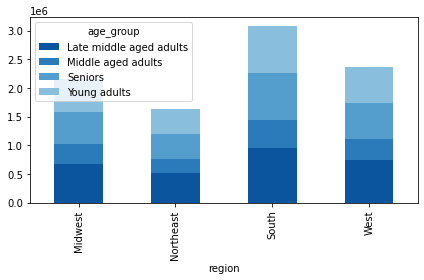

In [63]:
# Create bar chart
crosstab_region_age_chart = crosstab_region_age.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.tight_layout()

In [64]:
# Export chart
crosstab_region_age_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_region_age_chart.png'))

## Income categories by region

In [65]:
# Create a crosstab "region" & "income_categ"
crosstab_region_income = pd.crosstab(df_ords_prods_cust_merged_new["region"], df_ords_prods_cust_merged_new["income_categ"], dropna = False)

In [66]:
# Print
crosstab_region_income

income_categ,High income,Low income,Middle class,Upper middle class
region,,,,
Midwest,19503,230999,1645344,254425
Northeast,11627,172941,1253827,191634
South,25204,338474,2350837,362506
West,21115,251773,1802901,283481


In [67]:
# Copy to clipboard
crosstab_region_income.to_clipboard()

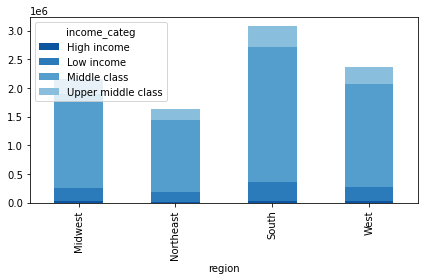

In [68]:
# Create bar chart
crosstab_region_income_chart = crosstab_region_income.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.tight_layout()

In [69]:
# Export chart
crosstab_region_income_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_region_income_chart.png'))

## Parental status by region

In [70]:
# Create a crosstab "region" & "parental_status"
crosstab_region_parent = pd.crosstab(df_ords_prods_cust_merged_new["region"], df_ords_prods_cust_merged_new["parental_status"], dropna = False)

In [71]:
# Print
crosstab_region_parent

parental_status,Not parent,Parent
region,,
Midwest,537408,1612863
Northeast,403531,1226498
South,769461,2307560
West,587288,1771982


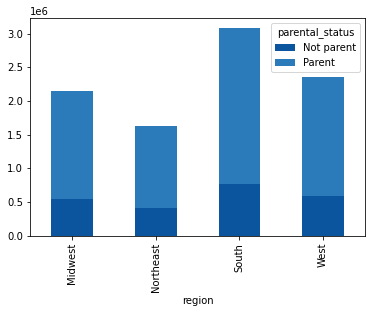

In [72]:
# Create bar chart
crosstab_region_parent_chart = crosstab_region_parent.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))                                                                                                  

In [73]:
# Export chart
crosstab_region_parent_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_region_parent_chart.png'))

## Loyalty status by region

In [74]:
# Create a crosstab "region" & "loyalty_flag"
crosstab_region_loyalty = pd.crosstab(df_ords_prods_cust_merged_new["region"], df_ords_prods_cust_merged_new["loyalty_flag"], dropna = False, margins = True)

In [75]:
# Print
crosstab_region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer,All
region,,,,
Midwest,677996,362550,1109725,2150271
Northeast,529682,272721,827626,1630029
South,982027,507059,1587935,3077021
West,771218,393858,1194194,2359270
All,2960923,1536188,4719480,9216591


In [76]:
crosstab_region_loyalty.to_clipboard()

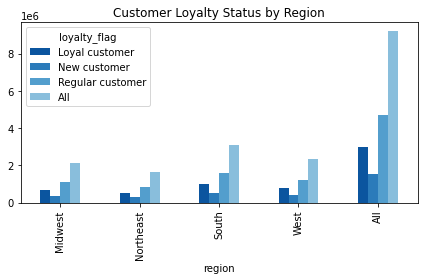

In [77]:
# Create bar chart
crosstab_region_loyalty_chart = crosstab_region_loyalty.plot(kind='bar', stacked=False, color = sns.color_palette("Blues_r"))
plt.title("Customer Loyalty Status by Region")
plt.tight_layout()

In [78]:
# Export chart
crosstab_region_loyalty_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_region_loyalty_chart.png'))

## Spending behaviour by region

In [79]:
# Create a crosstab "region" & "spending_flag"
crosstab_region_spend = pd.crosstab(df_ords_prods_cust_merged_new["region"], df_ords_prods_cust_merged_new["spending_flag"], dropna = False)

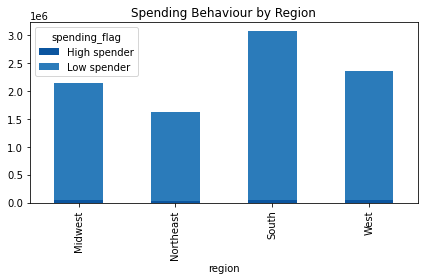

In [80]:
# Create bar chart
crosstab_region_spend_chart = crosstab_region_spend.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.title("Spending Behaviour by Region")
plt.tight_layout()

In [81]:
# Export chart
crosstab_region_spend_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_region_spend_chart.png'))

## Daily orders by region

In [82]:
# Create a crosstab "order_day_of_week" & "region"
crosstab_odow_region= pd.crosstab(df_ords_prods_cust_merged_new["order_day_of_week"], df_ords_prods_cust_merged_new["region"], dropna = False)

Text(0.5, 1.0, 'Daily orders by region')

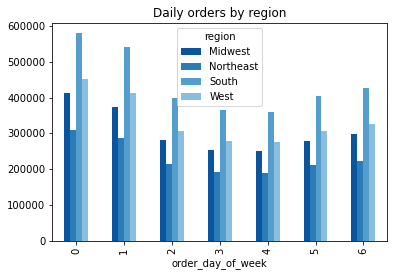

In [83]:
# Create bar chart
crosstab_odow_region_chart = crosstab_odow_region.plot(color = sns.color_palette("Blues_r"), stacked=False, kind='bar')      
plt.title("Daily orders by region")

In [84]:
# Export chart
crosstab_odow_region_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_odow_region_chart.png'))

## Spending by department & region

In [85]:
# Create a crosstab "department" & "region"
crosstab_dept_region = pd.crosstab(df_ords_prods_cust_merged_new["department"], df_ords_prods_cust_merged_new["region"], dropna = False)

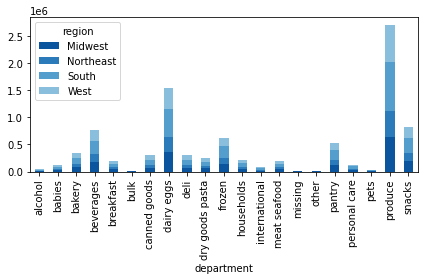

In [86]:
# Create bar chart
crosstab_dept_region_chart = crosstab_dept_region.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.tight_layout()

# Customer profiles by department

## Spending by department & age group

In [109]:
# Create a crosstab "department" & "age_group"
crosstab_dept_age = pd.crosstab(df_ords_prods_cust_merged_new["department"], df_ords_prods_cust_merged_new["age_group"], dropna = False)

In [110]:
# Print
crosstab_dept_age

age_group,Late middle aged adults,Middle aged adults,Seniors,Young adults
department,,,,
alcohol,13779,6008,10772,11955
babies,38782,20307,32465,32523
bakery,104307,52099,88257,88718
beverages,242694,117633,203647,200803
breakfast,62897,30975,52150,53471
bulk,3102,1549,2609,2738
canned goods,93161,46629,79591,79509
dairy eggs,480944,241771,408906,413233
deli,93523,47096,79188,78880


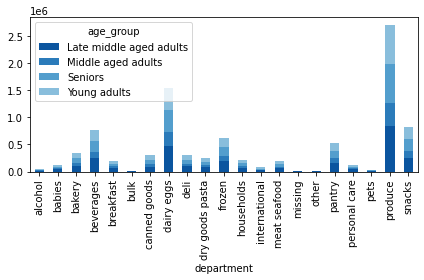

In [111]:
# Create bar chart
crosstab_dept_age_chart = crosstab_dept_age.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.tight_layout()

In [112]:
# Export chart
crosstab_dept_age_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_dept_age_chart.png'))

## Spending by department & income

In [113]:
# Create a crosstab "department" & "income_categ"
crosstab_dept_income = pd.crosstab(df_ords_prods_cust_merged_new["department"], df_ords_prods_cust_merged_new["income_categ"], dropna = False)

In [114]:
# Print
crosstab_dept_income

income_categ,High income,Low income,Middle class,Upper middle class
department,,,,
alcohol,1908,5403,29896,5307
babies,590,8644,99361,15482
bakery,3738,31636,256967,41040
beverages,7624,113953,556837,86363
breakfast,1963,27059,147313,23158
bulk,9,1367,7544,1078
canned goods,2822,23035,236114,36919
dairy eggs,13482,148502,1197363,185507
deli,2242,31609,229251,35585


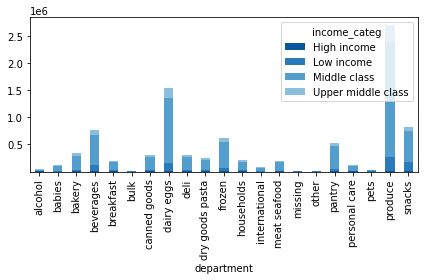

In [115]:
# Create bar chart
crosstab_dept_income_chart = crosstab_dept_income.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.tight_layout()

In [116]:
# Export chart
crosstab_dept_income_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_dept_income_chart.png'))

## Spending by department & parental status

In [117]:
# Create a crosstab "department" & "parental_status"
crosstab_dept_parent = pd.crosstab(df_ords_prods_cust_merged_new["department"], df_ords_prods_cust_merged_new["parental_status"], dropna = False)

In [118]:
# Print
crosstab_dept_parent

parental_status,Not parent,Parent
department,,
alcohol,10870,31644
babies,31059,93018
bakery,83285,250096
beverages,192008,572769
breakfast,49362,150131
bulk,2397,7601
canned goods,74037,224853
dairy eggs,384642,1160212
deli,75333,223354


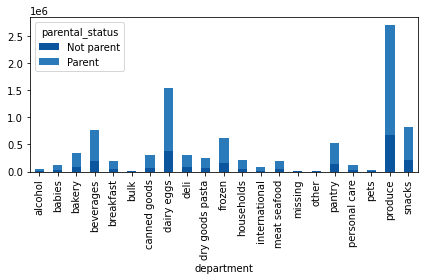

In [119]:
# Create bar chart
crosstab_dept_parent_chart = crosstab_dept_parent.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.tight_layout()

In [120]:
# Export chart
crosstab_dept_parent_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_dept_parent_chart.png'))

# Customer profiles by loyalty status

## Loyalty status by age group

In [99]:
# Create a crosstab "loyalty_flag" & "age_group"
crosstab_loyalty_age = pd.crosstab(df_ords_prods_cust_merged_new["loyalty_flag"], df_ords_prods_cust_merged_new["age_group"], dropna = False)

In [100]:
# Print
crosstab_loyalty_age

age_group,Late middle aged adults,Middle aged adults,Seniors,Young adults
loyalty_flag,,,,
Loyal customer,935191,467982,777738,780012
New customer,479828,233403,411113,411844
Regular customer,1470313,738278,1256003,1254886


In [101]:
# Copy to clipboard
crosstab_loyalty_age.to_clipboard()

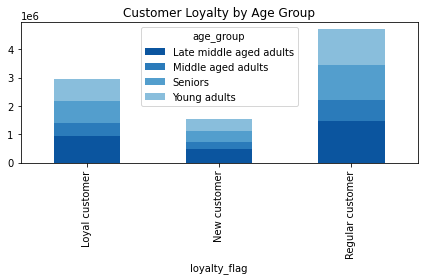

In [102]:
# Create bar chart
crosstab_loyalty_age_chart = crosstab_loyalty_age.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))   
plt.title("Customer Loyalty by Age Group")
plt.tight_layout()

In [103]:
# Export line chart outside Jupyter as image file
crosstab_loyalty_age_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_loyalty_age_chart.png'))

## Loyalty status by income category

In [104]:
# Create a crosstab "income_categ" & "loyalty_flag"
crosstab_loyalty_income = pd.crosstab(df_ords_prods_cust_merged_new["loyalty_flag"], df_ords_prods_cust_merged_new["income_categ"], dropna = False)

In [105]:
# Print
crosstab_loyalty_income

income_categ,High income,Low income,Middle class,Upper middle class
loyalty_flag,,,,
Loyal customer,29670,297274,2281373,352606
New customer,7474,191045,1157630,180039
Regular customer,40305,505868,3613906,559401


In [106]:
# Copy to clipboard
crosstab_loyalty_income.to_clipboard()

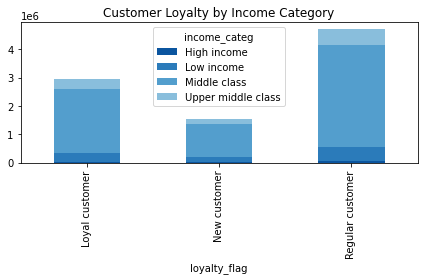

In [107]:
# Create bar chart
crosstab_loyalty_income_chart = crosstab_loyalty_income.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))   
plt.title("Customer Loyalty by Income Category")
plt.tight_layout()

In [108]:
# Export chart
crosstab_loyalty_income_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_loyalty_income_chart.png'))

## Loyalty by parental status

In [109]:
# Create a crosstab "income_categ" & "loyalty_flag"
crosstab_loyalty_parent = pd.crosstab(df_ords_prods_cust_merged_new["loyalty_flag"], df_ords_prods_cust_merged_new["parental_status"], dropna = False)

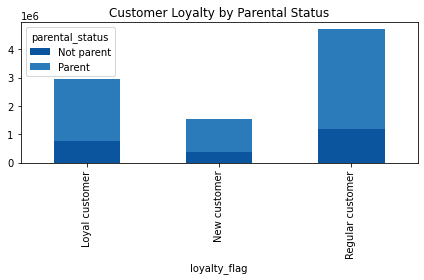

In [110]:
# Create bar chart
crosstab_loyalty_parent_chart = crosstab_loyalty_parent.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))   
plt.title("Customer Loyalty by Parental Status")
plt.tight_layout()

In [111]:
# Export chart
crosstab_loyalty_parent_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_loyalty_parent_chart.png'))

## Spending behaviour by loyalty status

In [112]:
# Create a crosstab "loyalty_flag" & "spending_flag"
crosstab_loyalty_spend = pd.crosstab(df_ords_prods_cust_merged_new["loyalty_flag"], df_ords_prods_cust_merged_new["spending_flag"], dropna = False)

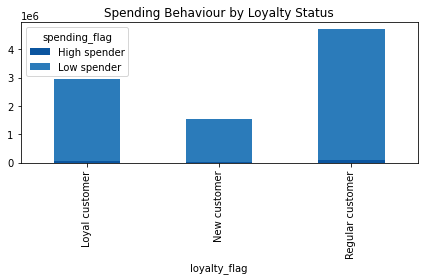

In [113]:
# Create bar chart
crosstab_loyalty_spend_chart = crosstab_loyalty_spend.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r")) 
plt.title("Spending Behaviour by Loyalty Status")
plt.tight_layout()

In [114]:
# Export chart
crosstab_loyalty_spend_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_loyalty_spend_chart.png'))

## Daily orders by loyalty status

In [115]:
# Create a crosstab "order_day_of_week" & "loyalty_flag"
crosstab_odow_loyalty = pd.crosstab(df_ords_prods_cust_merged_new["order_day_of_week"], df_ords_prods_cust_merged_new["loyalty_flag"], dropna = False)

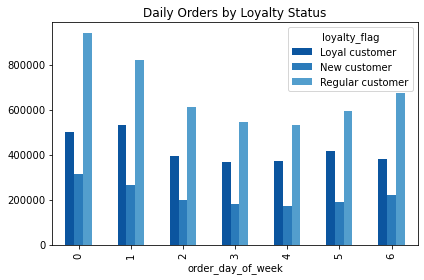

In [116]:
# Create bar chart
crosstab_odow_loyalty_chart = crosstab_odow_loyalty.plot(color = sns.color_palette("Blues_r"), kind='bar', stacked=False)
plt.title("Daily Orders by Loyalty Status")
plt.tight_layout()

In [117]:
# Export line chart outside Jupyter as image file
crosstab_odow_loyalty_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_odow_loyalty_chart.png'))

## Spending by department & loyalty status

In [118]:
# Create a crosstab "department" & "loyalty_flag"
crosstab_dept_loyalty = pd.crosstab(df_ords_prods_cust_merged_new["department"], df_ords_prods_cust_merged_new["loyalty_flag"], dropna = False)

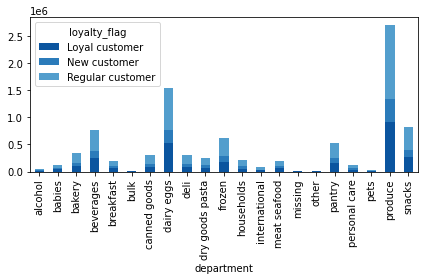

In [119]:
# Create bar chart
crosstab_dept_loyalty_chart = crosstab_dept_loyalty.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))   
plt.tight_layout()

In [120]:
# Export chart
crosstab_dept_loyalty_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_dept_loyalty_chart.png'))

# Variables to explore specific customer profiles (examples)

## High earning customers

In [126]:
# Create a crosstab "age_group" & "income_categ"
crosstab_age_income = pd.crosstab(df_ords_prods_cust_merged_new["age_group"], df_ords_prods_cust_merged_new["income_categ"], dropna = False)

In [127]:
# Print
crosstab_age_income

income_categ,High income,Low income,Middle class,Upper middle class
age_group,,,,
Late middle aged adults,33310,239903,2087986,524133
Middle aged adults,9271,176236,1138870,115286
Seniors,25197,201898,1778857,438902
Young adults,9671,376150,2047196,13725


In [132]:
# Copy to clipboard
crosstab_age_income.to_clipboard()

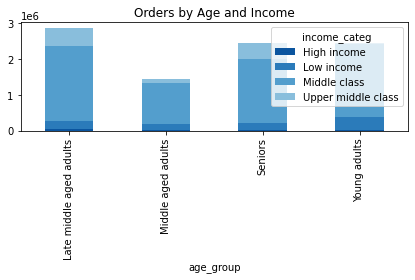

In [130]:
# Create bar chart
crosstab_age_income_chart = crosstab_age_income.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.title("Orders by Age and Income")
plt.tight_layout()

In [131]:
# Export chart
crosstab_age_income_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_age_income_chart.png'))

## Young parents

In [71]:
# Create a crosstab "parental_status" & "age_group"
crosstab_parent_age = pd.crosstab(df_ords_prods_cust_merged_new["age_group"], df_ords_prods_cust_merged_new["parental_status"], dropna = False)

In [72]:
# Print
crosstab_parent_age

parental_status,Not parent,Parent
age_group,,
Late middle aged adults,726390,2158942
Middle aged adults,357172,1082491
Seniors,603611,1841243
Young adults,610515,1836227


In [73]:
# Copy to clipboard
crosstab_parent_age.to_clipboard()

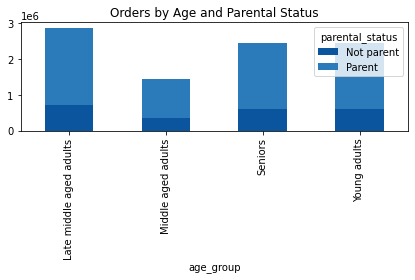

In [74]:
# Create bar chart
crosstab_parent_age_chart = crosstab_parent_age.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r")) 
plt.title("Orders by Age and Parental Status")
plt.tight_layout()

In [75]:
# Export chart
crosstab_parent_age_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_parent_age_chart.png'))

In [66]:
# Create a crosstab "parental_status" & "department"
crosstab_parent_spend = pd.crosstab(df_ords_prods_cust_merged_new["department"], df_ords_prods_cust_merged_new["spending_flag"], dropna = False)

In [67]:
# Print
crosstab_parent_spend

spending_flag,High spender,Low spender
department,,
alcohol,2732,39782
babies,934,123143
bakery,6760,326621
beverages,14914,749863
breakfast,3587,195906
bulk,50,9948
canned goods,5041,293849
dairy eggs,28986,1515868
deli,4313,294374


In [69]:
# Copy to clipboard
crosstab_parent_spend.to_clipboard()

## Loyal customers with large families

In [84]:
# Create a crosstab "loyalty_flag" & "n_dependants"
crosstab_loyalty_depend = pd.crosstab(df_ords_prods_cust_merged_new["loyalty_flag"], df_ords_prods_cust_merged_new["n_dependants"], dropna = False)

In [85]:
# Print
crosstab_loyalty_depend

n_dependants,0,1,2,3
loyalty_flag,,,,
Loyal customer,747181,732944,735770,745028
New customer,382066,382934,389031,382157
Regular customer,1168441,1181697,1177627,1191715


In [95]:
# Copy to clipboard
crosstab_loyalty_depend.to_clipboard()

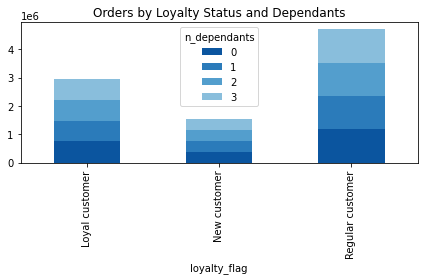

In [93]:
# Create bar chart
crosstab_loyalty_depend_chart = crosstab_loyalty_depend.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.title("Orders by Loyalty Status and Dependants")
plt.tight_layout()

In [94]:
# Export chart
crosstab_loyalty_depend_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_loyalty_depend_chart.png'))

## Singles with pets

In [96]:
# Create a crosstab "deparment" & "fam_status"
crosstab_dept_fam = pd.crosstab(df_ords_prods_cust_merged_new["department"], df_ords_prods_cust_merged_new["fam_status"], dropna = False)

In [97]:
# Print
crosstab_dept_fam

fam_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,3496,2592,29052,7374
babies,10619,5822,87196,20440
bakery,28599,16056,234040,54686
beverages,65774,35220,537549,126234
breakfast,16882,10002,140129,32480
bulk,782,500,7101,1615
canned goods,24904,14076,210777,49133
dairy eggs,132161,74882,1085330,252481
deli,26123,14203,209151,49210


In [98]:
# Copy to clipboard
crosstab_dept_fam.to_clipboard()

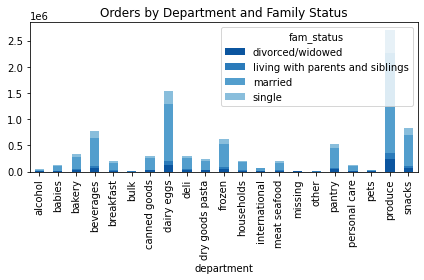

In [104]:
# Create bar chart
crosstab_dept_fam_chart = crosstab_dept_fam.plot(kind='bar', stacked=True, color = sns.color_palette("Blues_r"))
plt.title("Orders by Department and Family Status")
plt.tight_layout()

In [105]:
# Export chart
crosstab_dept_fam_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_dept_fam_chart.png'))